# Retail Market Analysis

You're a marketing analyst and you've been told by the Chief Marketing Officer that recent marketing campaigns have not been as effective as they were expected to be. You need to analyze the data set to understand this problem and propose data-driven solutions.

This dataset take from [Here](https://www.kaggle.com/jackdaoud/marketing-data)

<b>Features :</b> 
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if customer complained in the last 2 years, 0 otherwise
- Country: Customer's location
- MntWines: Amount spent on wine in the last 2 years
- MntFruits: Amount spent on fruits in the last 2 years
- MntMeatProducts: Amount spent on meat in the last 2 years
- MntFishProducts: Amount spent on fish in the last 2 years
- MntSweetProducts: Amount spent on sweets in the last 2 years
- MntGoldProds: Amount spent on gold in the last 2 years
- NumWebPurchases: Number of purchases made through the company's web site
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company's web site in the last month
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels import api
from statsmodels.formula import api as sf
import warnings
warnings.filterwarnings('ignore')

green_dark = ['#5D5D5D','#C1C1C1','#3CD89B','#007044']

In [2]:
data = pd.read_csv('C://Users/USER/Desktop/datasets/marketing_data.csv')

In [3]:
data.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
2235,10142,1976,PhD,Divorced,"$66,476.00",0,1,3/7/13,99,372,...,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,"$31,056.00",1,0,1/22/13,99,5,...,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,"$46,310.00",1,0,12/3/12,99,185,...,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,"$65,819.00",0,0,11/29/12,99,267,...,10,3,0,0,0,0,0,0,0,IND
2239,4070,1969,PhD,Married,"$94,871.00",0,2,9/1/12,99,169,...,4,7,0,1,1,0,0,1,0,CA


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
ID                     2240 non-null int64
Year_Birth             2240 non-null int64
Education              2240 non-null object
Marital_Status         2240 non-null object
 Income                2216 non-null object
Kidhome                2240 non-null int64
Teenhome               2240 non-null int64
Dt_Customer            2240 non-null object
Recency                2240 non-null int64
MntWines               2240 non-null int64
MntFruits              2240 non-null int64
MntMeatProducts        2240 non-null int64
MntFishProducts        2240 non-null int64
MntSweetProducts       2240 non-null int64
MntGoldProds           2240 non-null int64
NumDealsPurchases      2240 non-null int64
NumWebPurchases        2240 non-null int64
NumCatalogPurchases    2240 non-null int64
NumStorePurchases      2240 non-null int64
NumWebVisitsMonth      2240 non-null int64
AcceptedCmp3           2240 n

### Section 01: Exploratory Data Analysis

- Are there any null values or outliers? How will you wrangle/handle them?
- Are there any variables that warrant transformations?
- Are there any useful variables that you can engineer with the given data?
- Do you notice any patterns or anomalies in the data? Can you plot them?

#### 1.1  Are there any null values or outliers? How will you wrangle/handle them?

As we can see information of the data above shows there are null values on Income column, First step, we replace column name  ' Income ' into 'Income'

In [5]:
data.rename(columns={data.columns[4]:'Income'}, inplace=True)

The second, adjusting the format like 
- remove $ sign
- .00 on the back, and 
- replace comma (,) sign into point 

example : $123,456.00 to 123456 

In [6]:
def income(data):
    data = str(data)
    return data.strip('$ ').replace('.00','').replace(',','')

In [7]:
data['Income'] = data['Income'].apply(lambda x: income(x))

The last, we change null value to 0

In [8]:
for i in range(len(data)):
    if data.loc[i,'Income'] == 'nan':
        data.loc[i,'Income'] = 0

#### 1.2   Are there any variables that warrant transformations?

In [9]:
data['Income'] = data['Income'].astype(np.int64)

In [10]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

In [11]:
data['Month'] = data['Dt_Customer'].dt.month

In [12]:
data['Year'] = data['Dt_Customer'].dt.year

#### 1.3   Are there any useful variables that you can engineer with the given data?

In [13]:
data['Age'] = 2021 - data['Year_Birth']

In [14]:
data['TotalPurchases'] = data[['NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)

#### 1.4   Do you notice any patterns or anomalies in the data? Can you plot them?

In [15]:
numeric_cols = ['Income','Year_Birth','Kidhome','Teenhome','Recency', 'MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds', 
 'NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

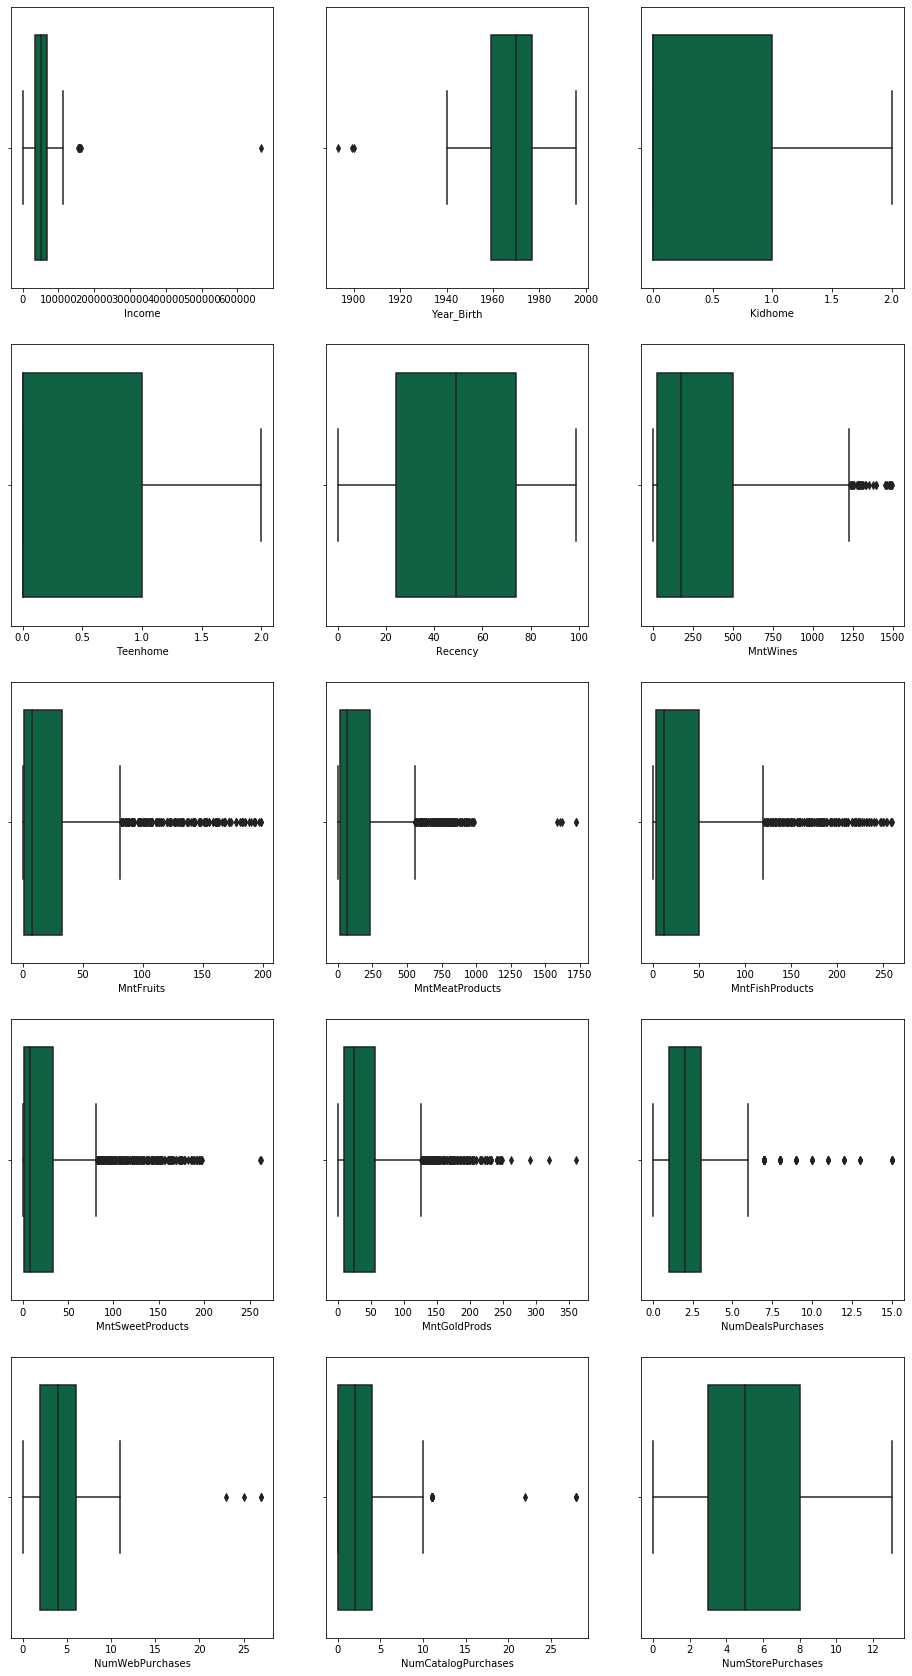

In [16]:
_, ax = plt.subplots(5,3, figsize=(16, 30))

for i in range(5):
    for j in [0,1,2]:
        sns.boxplot(data[numeric_cols[3*i+j]], ax=ax[i,j], orient='h', color=green_dark[3])

As we can see from those boxplots, there're more than one features that have outliers, but we highlight the outlier from Year_Birth column because there're 3 customers who were born in 1900 and less than 1900 and if we convert to age, the customers who were born on that years have more than 100 years old (1 century). So, we just drop data which has year birth less than equal 1900

In [17]:
data = data[data['Year_Birth'] >= 1940]

After that, we also can see Income has a outlier. the outlier so far from center distribution of income. we drop data which has income above 200000

In [18]:
data = data[data['Income'] < 200000]

Visualize the correlation among the numerical data features

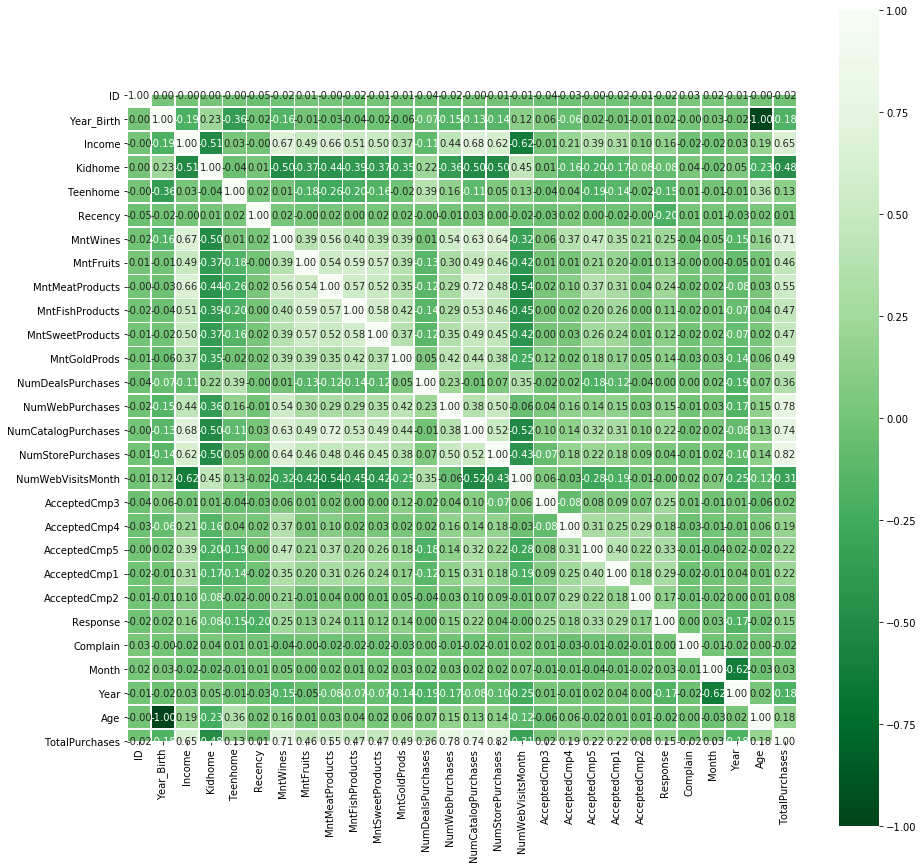

In [19]:
_, ax = plt.subplots(1,1,figsize=(15,15))
sns.heatmap(data.corr(), annot=True, linewidth=.5, square=True, ax=ax, cmap='Greens_r', fmt='.2f')
plt.show()

The relationship among numerical features can be calculate using pearson correlation. this relationship shows to our that the variables has strong or weak relationship. strong or weak relationship can you see from the value of correlation. The value of correlation only between -1 and 1. if the corr value is 1 its mean these variables has positive strong relationship and if corr value is -1, the relationship of these variables is negative strong . also if corr value is 0, there is no relationship.

### Section 02: Statistical Analysis
Please run statistical tests in the form of regressions to answer these questions & propose data-driven action recommendations to your CMO. Make sure to interpret your results with non-statistical jargon so your CMO can understand your findings.

- What factors are significantly related to the number of store purchases?
- Does US fare significantly better than the Rest of the World in terms of total purchases?
- Your supervisor insists that people who buy gold are more conservative. Therefore, people who spent an above average amount on gold in the last 2 years would have more in store purchases. Justify or refute this statement using an appropriate statistical test
- Fish has Omega 3 fatty acids which are good for the brain. Accordingly, do "Married PhD candidates" have a significant relation with amount spent on fish? What other factors are significantly related to amount spent on fish? (Hint: use your knowledge of interaction variables/effects)
- Is there a significant relationship between geographical regional and success of a campaign?

#### 2.1  What factors are significantly related to the number of store purchases?

In [20]:
X = data[['Income','Year_Birth','Kidhome','Teenhome','Recency', 'MntWines', 'MntFruits','MntMeatProducts', 
          'MntFishProducts', 'MntSweetProducts','MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
          'NumCatalogPurchases', 'NumWebVisitsMonth']]
y = data['NumStorePurchases']
X = api.add_constant(X)
lr = api.OLS(y, X).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      NumStorePurchases   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     199.1
Date:                Sun, 07 Feb 2021   Prob (F-statistic):               0.00
Time:                        14:59:56   Log-Likelihood:                -4855.4
No. Observations:                2236   AIC:                             9743.
Df Residuals:                    2220   BIC:                             9834.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -10.8625      8.467     -1.283      0.200     -27.467       5.742
Income               1.808e-05   3.81e-06      4.739      0.000    1.06e-05    2.56e-05
Year_Birth              0.0077      0.004      1.790      0.074      -0.001       0.016
Kidhome                -0.9045      0.112     -8.044      0.000      -1.125      -0.684
Teenhome                0.0590      0.106      0.556      0.578      -0.149       0.267
Recency                -0.0004      0.002     -0.252      0.801      -0.003       0.003
MntWines                0.0033      0.000     15.560      0.000       0.003       0.004
MntFruits               0.0087      0.002      5.541      0.000       0.006       0.012
MntMeatProducts        -0.0007      0.000     -2.012      0.044      -0.001   -1.75e-05
MntFishProducts         0.0050      0.001      4.259      0.000       0.003       0.007
MntSweetProducts        0.0041      0.002      2.706      0.007       0.001       0.007
MntGoldProds         5.545e-05      0.001      0.053      0.958      -0.002       0.002
NumDealsPurchases       0.2928      0.029      9.969      0.000       0.235       0.350
NumWebPurchases         0.1585      0.022      7.100      0.000       0.115       0.202
NumCatalogPurchases    -0.1085      0.027     -4.078      0.000      -0.161      -0.056
NumWebVisitsMonth      -0.2767      0.028     -9.778      0.000      -0.332      -0.221
==============================================================================
Omnibus:                       71.258   Durbin-Watson:                   1.814
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              181.678
Skew:                           0.073   Prob(JB):                     3.54e-40
Kurtosis:                       4.389   Cond. No.                     1.05e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Statistical testing of the relationship between the independent variable (as X) and the dependent variable (as y), regression is used and looks for p-values to interpret whether these variables are related statistically. In the second table of OLS Regression Results, there is a column P> | t | which is the p-value of the independent variable, and 'const' is the intercept of the regression model (can be ignored)

Based on the OLS Regression Result table above, there are 11 independent variables that have p-value below the significance level ($\alpha$ = 0.05) at 95% confidence interval, this indicates that the 11 independent variables have a relationship to the dependent variable and the other 5 independent variables have no relationship to the dependent variable.
Below is the list of 11 variable which has p-value under $\alpha$
- Income
- Kidhome
- MntWines
- MntFruits
- MntMeatProducts
- MntFishProducts
- MntSweetProducts
- NumDealsPurchases
- NumCatalogPurchases
- NumWebPurchases
- NumVisitsMonth



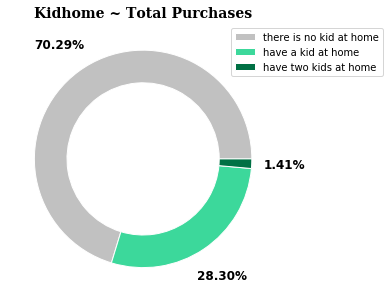

In [21]:
_, ax = plt.subplots(figsize=(8,5))
ax.pie(data.groupby('Kidhome')['TotalPurchases'].sum(), autopct='%.2f%%', textprops={'fontsize':12,'weight':'bold'}, 
       colors=green_dark[1:], pctdistance=1.3, wedgeprops={'width':0.3, 'edgecolor':'w'})
ax.legend(['there is no kid at home', 'have a kid at home', 'have two kids at home'], 
          ncol=1, loc='upper right', bbox_to_anchor=(1.4, 1))
ax.text(-1, 1.3, 'Kidhome ~ Total Purchases', family='serif',size=14, weight='bold')
plt.show()

Let's we see relationship between kidhome and total purchases. there are 3 categories : 'there is no kid at home', 'have a kid at home', and 'have 2 kids at home'. from the pie chart above shows total purchases percentage at 'there is no kid at home' category is the highest precentage of 70.29%, percentage at 'have a kid at home' is 28.30% then 'have 2 kids at home' only have percentage of 1.41%. from the explaining, that the higher of number of kidhome then the lower of total purchases. this explanation is suitable to statistical testing before between thoe variables.

#### 2.2   Does US fare significantly better than the Rest of the World in terms of total purchases?

In [22]:
model = sf.ols('TotalPurchases ~ C(Country)', data=data).fit()
api.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(Country),476.771454,7.0,1.155959,0.325062
Residual,131275.902518,2228.0,NaN,NaN


The relationship between Country against Total Purchases based on table above (PR(>F)) has higher p-value than significance level $\alpha$ at 95% confidence interval so that means there is no relationship between both of variables or no significantly relation

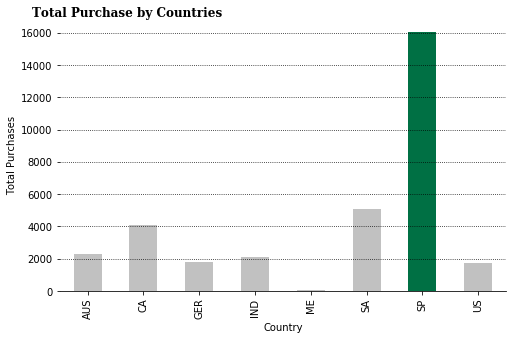

In [23]:
_, ax = plt.subplots(figsize=(8,5))
data.groupby('Country')['TotalPurchases'].sum().plot(kind='bar', ax=ax, 
                                                      color=[green_dark[i] for i in [1,1,1,1,1,1,3,1]])
plt.ylabel('Total Purchases')
ax.grid(color='black', axis='y', linestyle=':')
for x in ['left','right','top']:
    ax.spines[x].set_visible(False)
ax.text(-1, 17000, 'Total Purchase by Countries', fontsize=12, weight='bold', fontfamily='serif')
plt.show()

From graph above SP has highest of total purchases which followed by SA at the second order and the last order is ME. Therefore, US  does not fare significantly better than the Rest of the World in terms of total purchases

#### 2.3  Your supervisor insists that people who buy gold are more conservative. Therefore, people who spent an above average amount on gold in the last 2 years would have more in store purchases. Justify or refute this statement using an appropriate statistical test

There are two testing the relation between the amount of Gold product and the number store purchases:
   - Using visualization 
   - Using p-value

In [24]:
gold_mean = data['MntGoldProds'].mean()

In [25]:
upper_mean_gold = data[data['MntGoldProds'] > gold_mean][['MntGoldProds','NumStorePurchases']]
lower_mean_gold = data[data['MntGoldProds'] <= gold_mean][['MntGoldProds','NumStorePurchases']]

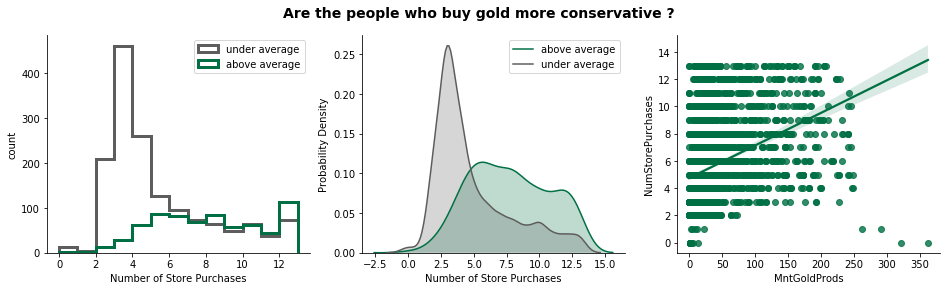

In [26]:
fig, ax = plt.subplots(1,3,figsize=(16,4))
fig.suptitle('Are the people who buy gold more conservative ?', fontsize=14, weight='bold')
ax[0].hist(lower_mean_gold['NumStorePurchases'], bins=13, histtype='step', color=green_dark[0], linewidth=3, label='under average')
ax[0].hist(upper_mean_gold['NumStorePurchases'], bins=13, histtype='step', color=green_dark[3], linewidth=3, label='above average')
sns.kdeplot(upper_mean_gold['NumStorePurchases'], c=green_dark[3], shade=True, ax=ax[1], label='above average')
sns.kdeplot(lower_mean_gold['NumStorePurchases'], c=green_dark[0], shade=True, ax=ax[1], label='under average')
sns.regplot(data['MntGoldProds'], data['NumStorePurchases'], ax=ax[2], color=green_dark[3])
ax[0].set_xlabel('Number of Store Purchases')
ax[0].set_ylabel('count')
ax[1].set_xlabel('Number of Store Purchases')
ax[1].set_ylabel('Probability Density')
ax[0].legend()
ax[1].legend()
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[2].spines['right'].set_visible(False)
ax[2].spines['top'].set_visible(False)
plt.show()

As you can see there are three graphs which shows the relationship between Amount Gold Product and Num of Store Purchases. the first graph (in the left) shows the information that the people who spent gold under average amount on gold in the last 2 years has the highest number store purchases at 2 to 5 and the people who spent gold above average amount on gold in the last 2 years has the highest number store purchase at 5, 6 and 12, the same thing and information which given by the second graph (in center). At the last graph (right) shows there are positive relation between these variables. these information appropriate with question from supervisor.

In [27]:
X = data['MntGoldProds']
y = data['NumStorePurchases']
X = api.add_constant(X)
lr = api.OLS(y, X).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      NumStorePurchases   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     384.3
Date:                Sun, 07 Feb 2021   Prob (F-statistic):           4.32e-79
Time:                        15:00:06   Log-Likelihood:                -5631.0
No. Observations:                2236   AIC:                         1.127e+04
Df Residuals:                    2234   BIC:                         1.128e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.7433      0.083     57.035      0.000       4.580       4.906
MntGoldProds     0.0239      0.001     19.604      0.000       0.022       0.026
==============================================================================
Omnibus:                      144.363   Durbin-Watson:                   1.760
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              172.089
Skew:                           0.675   Prob(JB):                     4.28e-38
Kurtosis:                       3.150   Cond. No.                         89.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As you can see on the OLS Regression Results table above, based on the modeling result of the relationship between MntGoldProds with NumStorePurchases, the p-value of this relationship is above significance level. as we know if the p-value on above significance level it means there is a relationship. the same thing to this relationship, MntGoldProds and NumStorePurchases has a relationship. that result has validated with visualization above

#### 2.4 Fish has Omega 3 fatty acids which are good for the brain. Accordingly, do "Married PhD candidates" have a significant relation with amount spent on fish? What other factors are significantly related to amount spent on fish? (Hint: use your knowledge of interaction variables/effects)

Finding information :
- Find relationship between Marital_Status and Education against MntFishProducts
- Find the features which has significance relation to MntFishProducts

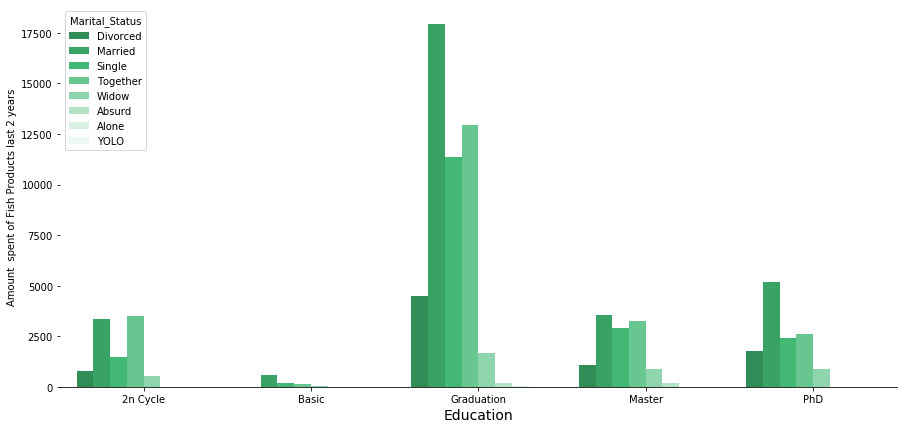

In [28]:
color_palette = ['#239b56', '#28b463','#2ecc71', '#58d68d', '#82e0aa', '#abebc6', '#d5f5e3', '#eafaf1']
_, ax = plt.subplots(figsize=(15,7))
sns.barplot(x='Education', 
            y='MntFishProducts', 
            hue='Marital_Status', 
            data=data.groupby(['Education','Marital_Status'], as_index=False)\
            [['Education','Marital_Status','MntFishProducts']].\
            sum(), 
            ax=ax, palette=color_palette)
ax.set_xlabel('Education', fontsize=14)
ax.set_ylabel('Amount  spent of Fish Products last 2 years')
for x in ['left','right','top']:
    ax.spines[x].set_visible(False)
plt.show()    

In [29]:
model = sf.ols('MntFishProducts ~ C(Education) + C(Marital_Status) + C(Education):C(Marital_Status)', data=data).fit()
api.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(Education),2.134544e+05,4.0,18.440361,0.000018
C(Marital_Status),8.200959e+04,7.0,4.048470,0.002834
C(Education):C(Marital_Status),2.323546e+05,28.0,2.867594,0.000004
Residual,6.380935e+06,2205.0,NaN,NaN


From the graph above, people who get graduation and have been married have the highest amount spent on fish products and the lowest is Basic education. So, a Married Ph.D. has significant relation to the amount spent on fish products. Also, this appropriate to the statistical test of these variables. According to the test result, the p-value of all variables is under of significance level of 95% confidence interval it means there is significant relationship between those variables.

In [30]:
X = data[['Year_Birth','Income','Kidhome','Teenhome','Recency', 'MntWines', 'MntFruits','MntMeatProducts', 
     'MntSweetProducts','MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
     'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']]
X = api.add_constant(X)
y = data['MntFishProducts']
lr_fish_variable = api.OLS(y, X).fit()
lr_fish_variable.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        MntFishProducts   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     159.9
Date:                Sun, 07 Feb 2021   Prob (F-statistic):               0.00
Time:                        15:00:11   Log-Likelihood:                -11299.
No. Observations:                2236   AIC:                         2.263e+04
Df Residuals:                    2220   BIC:                         2.272e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 247.6352    151.072      1.639      0.101     -48.622     543.892
Year_Birth             -0.1230      0.077     -1.605      0.109      -0.273       0.027
Income               9.882e-05   6.84e-05      1.445      0.149   -3.53e-05       0.000
Kidhome                -1.2019      2.036     -0.590      0.555      -5.194       2.790
Teenhome               -7.9965      1.885     -4.242      0.000     -11.693      -4.300
Recency                -0.0172      0.028     -0.619      0.536      -0.072       0.037
MntWines               -0.0108      0.004     -2.704      0.007      -0.019      -0.003
MntFruits               0.3168      0.027     11.586      0.000       0.263       0.370
MntMeatProducts         0.0333      0.006      5.495      0.000       0.021       0.045
MntSweetProducts        0.2806      0.026     10.733      0.000       0.229       0.332
MntGoldProds            0.1310      0.019      7.047      0.000       0.095       0.168
NumDealsPurchases      -0.9006      0.535     -1.682      0.093      -1.950       0.149
NumWebPurchases         0.0534      0.403      0.133      0.895      -0.737       0.844
NumCatalogPurchases     1.7551      0.475      3.695      0.000       0.824       2.687
NumStorePurchases       1.6065      0.377      4.259      0.000       0.867       2.346
NumWebVisitsMonth      -0.6945      0.516     -1.347      0.178      -1.706       0.317
==============================================================================
Omnibus:                      571.840   Durbin-Watson:                   1.879
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2680.743
Skew:                           1.143   Prob(JB):                         0.00
Kurtosis:                       7.852   Cond. No.                     1.05e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

For to know relationship between other variables be sides education and marital status, then we use the same statistical testing before. the result of statistical testing shows MntFishProducts has significant relationship with 8 independent variables, that is :
- Teenhome
- MntWines
- MntFruits
- MntMeatProducts
- MntSweetProducts
- MntGoldProds
- NumCatalogPurchases
- NumStorePurchases


#### 2.5   Is there a significant relationship between geographical regional and success of a campaign?

find the information :
- relationship between geographical regional (Country) against to each campaign that offered trough the test statistics
- the same purpose but with visualization

In [31]:
campaign_columns = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response']

In [32]:
data_campaign = data.groupby('Country')[campaign_columns].sum()

In [33]:
pvalue = []
for cmp_col in campaign_columns:
    table_cmp = api.stats.Table.from_data(data[[cmp_col,'Country']])
    chi2_p_value = table_cmp.test_nominal_association().pvalue
    pvalue.append(chi2_p_value)

In [34]:
pd.DataFrame({'Feature 1':campaign_columns, 'Feature 2':['Country']*6, 'p-values':pvalue})

,Feature 1,Feature 2,p-values
0,AcceptedCmp3,Country,0.638518
1,AcceptedCmp4,Country,0.410858
2,AcceptedCmp5,Country,0.602262
3,AcceptedCmp1,Country,0.860008
4,AcceptedCmp2,Country,0.349382
5,Response,Country,0.076137


This test using $\chi^2$ test for statistical testing due to both of those variables are categorical or nominal data. there are 7 variables which is one of those variables is Country and the others 6 variables are accepted campaign like on the table above. The result of this test that is the p-value of 6 variables have under significance level it means those variables have no significant relationship against the country.

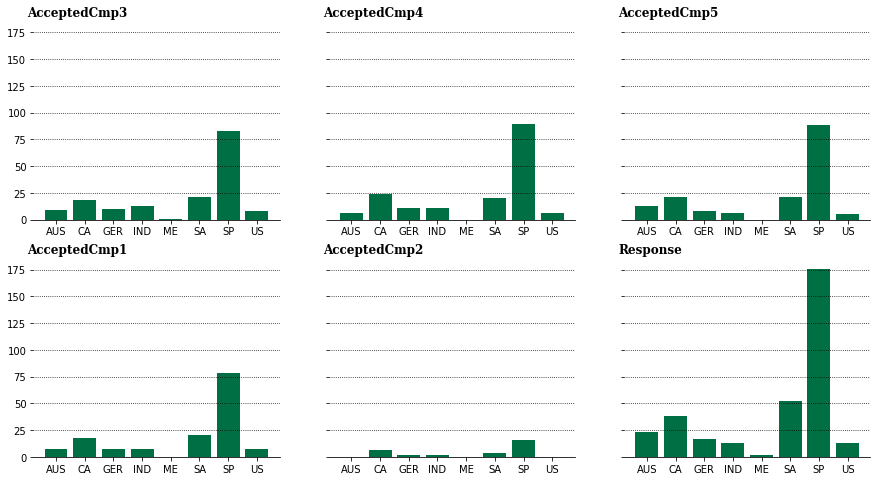

In [35]:
_, ax = plt.subplots(2,3,figsize=(15,8), sharey=True)
for i in range(2):
    for j in range(3):
        ax[i,j].bar(data_campaign.index, data_campaign[campaign_columns[3*i+j]], color=green_dark[3])
        ax[i,j].grid(color='black', axis='y', linestyle=':')
        ax[i,j].text(-1, 190, campaign_columns[3*i+j], fontsize=12, weight='bold', fontfamily='serif')
        for x in ['left','right','top']:
            ax[i,j].spines[x].set_visible(False)

Six graphs above explain the relationship of country to each campaign's success. each graph have a similar pattern of success in SP (Spain) for each campaign. the 2nd campaign has a lowest of campaign's success for all countries. The most successful occurs in the last campaign

### Section 03: Data Visualization
Please plot and visualize the answers to the below questions.
- Which marketing campaign is most successful?
- Which products are performing best?
- Which channels are underperforming?

#### 3.1   Which marketing campaign is most successful?

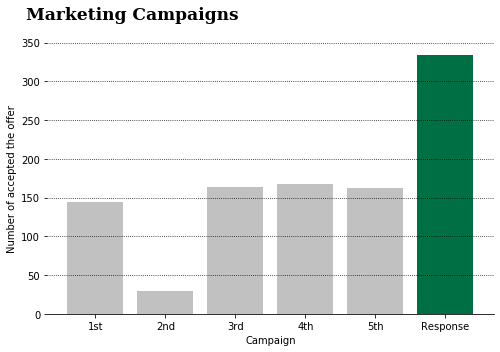

In [36]:
most_successful_cmp = data[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5', 'Response']].sum()
_, ax = plt.subplots(figsize=(8,5)) 
ax.bar(most_successful_cmp.index, most_successful_cmp, color=[green_dark[i] for i in [1,1,1,1,1,3]])
ax.set_xticklabels(['1st', '2nd', '3rd', '4th', '5th', 'Response'])
ax.set_ylabel('Number of accepted the offer')
ax.set_xlabel('Campaign')
ax.grid(color='black', axis='y', linestyle=':')
for x in ['left','right','top']:
    ax.spines[x].set_visible(False)
ax.text(-1, 380, 'Marketing Campaigns', fontsize=17, weight='bold', fontfamily='serif')
plt.show()

To offering the products, the company must promote the products through campaign.There are a few of campaigns which is executed by company. 1st campaign obtain number of accepted the offering < 150, Then in the 2nd campaign is decrease significantly to < 50, its due to failure the campaign method in 2nd campaign. the number of accepted the offering is increase in 3rd campaign. At the last, the highest number of acceped the offer occurs in the last campaign of > 300. that means method of the last campaign is successful, so occurs increase significantly almost twice (marked by green bar)

#### 3.2   Which products are performing best?

Finding information:
- Looking for The best performance of products,
- Looking for two of the best performance of products for each month in 2013 and 2014, and
- Looking for two of the best performance of products for each country

In [37]:
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts','MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

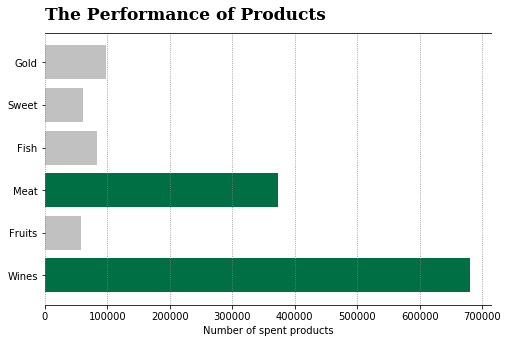

In [38]:
fig, ax = plt.subplots(figsize=(8,5))
ax.barh(data[product_columns].sum().index, data[product_columns].sum(), color=[green_dark[i] for i in [3,1,3,1,1,1]])
ax.set_xlabel('Number of spent products')
ax.grid(color='grey', axis='x', linestyle=':')
plt.yticks(np.arange(6),['Wines','Fruits','Meat','Fish','Sweet','Gold'])
for x in ['left','right']:
    ax.spines[x].set_visible(False)
ax.text(0, 6, 'The Performance of Products', fontsize=17, weight='bold', fontfamily='serif')
plt.show()

The Retail company offering many kinds of the products among others is wine, fruits, meat, fish, sweet, and gold products. each product has different performance as in the graph above that showing performance of each product. From the graph, the product with the best performance in the first order is wine with the number of spent > 650000 and followed by meat at second order with the number of spent > 350000.

In [39]:
best_prods_spent_monthly_2013 = data[data['Year']==2013].groupby('Month', as_index=False)[['MntMeatProducts','MntWines']].sum()
best_prods_spent_monthly_2014 = data[data['Year']==2014].groupby('Month', as_index=False)[['MntMeatProducts','MntWines']].sum()

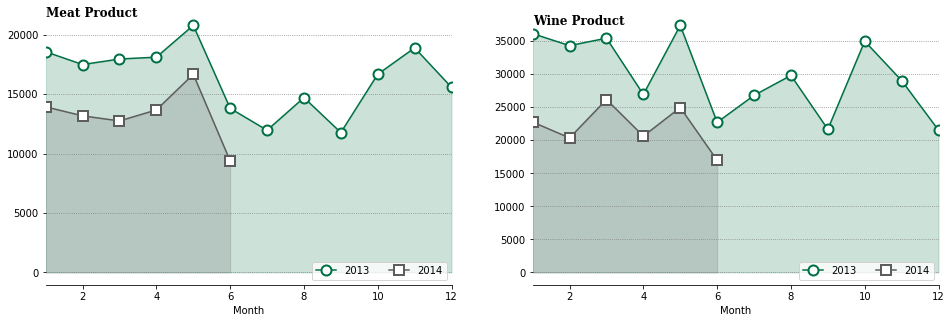

In [40]:
fig, ax = plt.subplots(1,2,figsize=(16,5))
best_prods_spent_monthly_2013.plot.line(x='Month', y='MntMeatProducts', ax=ax[0], color=green_dark[3], 
                                   marker='o',mfc='w', mec=green_dark[3], mew=2, ms=10, label='2013')
best_prods_spent_monthly_2014.plot.line(x='Month', y='MntMeatProducts', ax=ax[0], color=green_dark[0], 
                                   marker='s',mfc='w', mec=green_dark[0], mew=2, ms=10, label='2014')
best_prods_spent_monthly_2013.plot.line(x='Month', y='MntWines', ax=ax[1], color=green_dark[3], 
                                   marker='o',mfc='w', mec=green_dark[3], mew=2, ms=10, label='2013')
best_prods_spent_monthly_2014.plot.line(x='Month', y='MntWines', ax=ax[1], color=green_dark[0], 
                                   marker='s',mfc='w', mec=green_dark[0], mew=2, ms=10, label='2014')
ax[0].fill_between(best_prods_spent_monthly_2013['Month'], best_prods_spent_monthly_2013['MntMeatProducts'], color=green_dark[3], alpha=0.2)
ax[0].fill_between(np.arange(1,7), best_prods_spent_monthly_2014['MntMeatProducts'], color=green_dark[0], alpha=0.2)
ax[1].fill_between(best_prods_spent_monthly_2013['Month'], best_prods_spent_monthly_2013['MntWines'], color=green_dark[3], alpha=0.2)
ax[1].fill_between(np.arange(1,7), best_prods_spent_monthly_2014['MntWines'], color=green_dark[0], alpha=0.2)
ax[0].grid(color='grey', axis='y', linestyle=':')
ax[1].grid(color='grey', axis='y', linestyle=':')
ax[0].text(1, 21500, 'Meat Product', fontsize=12, weight='bold', fontfamily='serif')
ax[1].text(1, 37500, 'Wine Product', fontsize=12, weight='bold', fontfamily='serif')
ax[0].legend(loc=4, ncol=2)
ax[1].legend(loc=4, ncol=2)
for x in ['left','right','top']:
    ax[0].spines[x].set_visible(False)
    ax[1].spines[x].set_visible(False)
plt.show()

The graph above shows the product performance in 2013 to 2014 from two of the best performance products. 
- The highest performance occurs in May 2013 
  - Meat product : > 20000 
  - Wine product : > 35000. 
- Also, the lowest performance occurs in June 2014
  - Meat product : < 10000  
  - Wine product : < 20000  
- The average of performance of products in january to june 2013 is higher than january to june 2014
- From whole of graphs above (2013 and 2014) indicating there is a decrease of the spend in the next few months in 2014

In [41]:
best_prod_spent_country = data.groupby('Country', as_index=False)[['MntMeatProducts','MntWines']].sum()

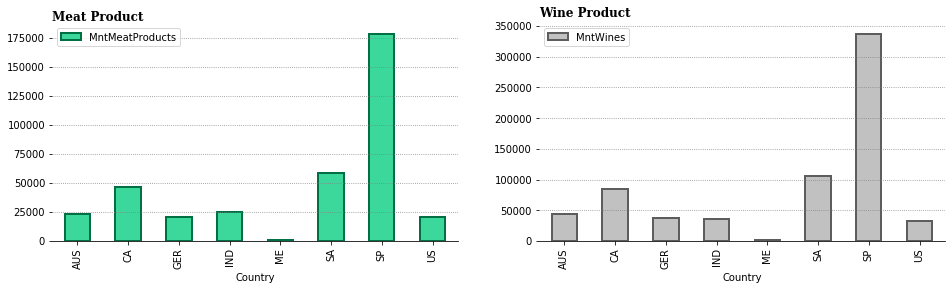

In [42]:
fig, ax = plt.subplots(1,2,figsize=(16,4))
best_prod_spent_country.plot.bar(x='Country', y='MntMeatProducts', ax=ax[0], color=green_dark[3], 
                                fc=green_dark[2], ec=green_dark[3], lw=2)
best_prod_spent_country.plot.bar(x='Country', y='MntWines', ax=ax[1], color=green_dark[3], 
                                fc=green_dark[1], ec=green_dark[0], lw=2)
ax[0].grid(color='grey', axis='y', linestyle=':')
ax[1].grid(color='grey', axis='y', linestyle=':')
ax[0].text(-0.5, 190000, 'Meat Product', fontsize=12, weight='bold', fontfamily='serif')
ax[1].text(-0.5, 365000, 'Wine Product', fontsize=12, weight='bold', fontfamily='serif')
for x in ['left','right','top']:
    ax[0].spines[x].set_visible(False)
    ax[1].spines[x].set_visible(False)
plt.show()

From the graph above obtained that :
- The highest amount spend occurs in SP for both of products
  - Meat product : > 175000
  - wine product : > 300000
- The lowest amount spend occurs in ME for both of products
  - meat product : < 25000
  - wine product : < 25000

#### 3.3   Which channels are underperforming?

In [43]:
data_channel = data[['NumStorePurchases','NumWebPurchases','NumCatalogPurchases','NumDealsPurchases']].sum()

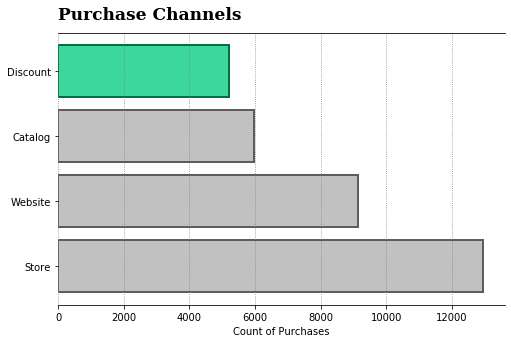

In [44]:
_, ax = plt.subplots(figsize=(8,5))
ax.barh(data_channel.index, data_channel, ec=[green_dark[i] for i in [0,0,0,3]], lw=2, color=[green_dark[i] for i in [1,1,1,2]])
plt.yticks(np.arange(4), ['Store','Website', 'Catalog', 'Discount'])
ax.set_xlabel('Count of Purchases')
ax.grid(color='grey', axis='x', linestyle=':')
for x in ['left','right']:
    ax.spines[x].set_visible(False)
ax.text(0, 3.8, 'Purchase Channels', fontsize=17, weight='bold', fontfamily='serif')
plt.show()

The bar chart contains four purchases channels that is store, website, catalog, and discount(deals). from the chart, discount/deals channel has a lowest of count of purchases, and the other sides, store channel has a highest of count of purchases

#### Addition Analysis

In [45]:
income_per_country = data.groupby('Country', as_index=False)[['Country','Income']].sum()
income_per_country['Income'] = income_per_country['Income']/1000000

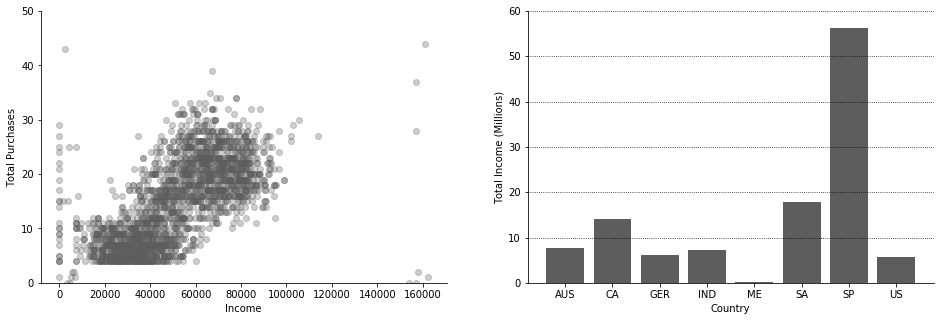

In [46]:
fig, ax = plt.subplots(1,2,figsize=(16,5))
ax[0].scatter(data['Income'], data['TotalPurchases'], c=green_dark[0], alpha=0.3)
ax[1].bar(income_per_country['Country'], income_per_country['Income'], color=green_dark[0])
ax[0].set_xlabel('Income')
ax[0].set_ylabel('Total Purchases')
ax[1].set_xlabel('Country')
ax[1].set_ylabel('Total Income (Millions)')
for i in ['top','right']:
    ax[0].spines[i].set_visible(False)
    ax[1].spines[i].set_visible(False)
ax[1].grid(axis='y', c='black', linestyle=':')
ax[0].set_ylim(0, 50)
ax[1].set_ylim(0, 60)
plt.show()

Let's we to explore the other variable, the variable is Income. There are 2 graphs above, first graph (in the left) is relationship between Income and Total Purchases and the second graph is total income for each country (in the right).
- First graph shows the pattern that mean the higher income of customers then the higher total purchases that spend by them , and it's mean there is positive relationship between two variables. If we deep dive into the pattern, we will find the cluster between income and total purchases that marked by overlapping the data in graph. There are 2 clusters 
  - High income cluster : income between 50000 to 100000 and total purchases about 15 to 30
  - Low income cluster : income between 10000 to 60000 and total purchases about 0 to 15
- At the second graph, SP become the highest total income country and the second is SA. and the lowest total income is ME 

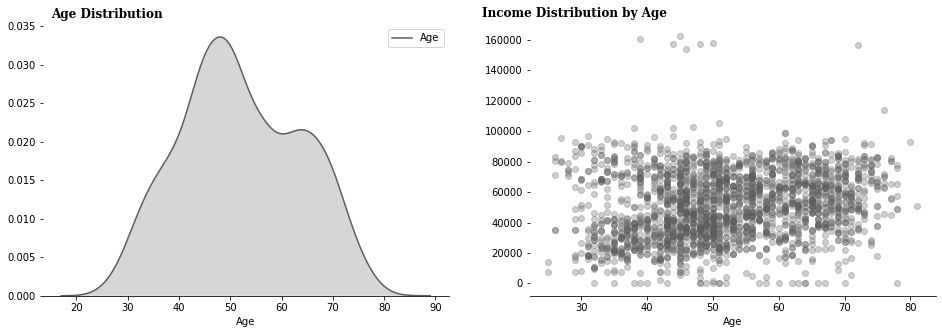

In [47]:
fig, ax = plt.subplots(1,2,figsize=(16,5))
sns.kdeplot(data['Age'], shade=True, color=green_dark[0], ax=ax[0])
ax[0].text(15, 0.036, 'Age Distribution', fontsize=12, family='serif', weight='bold')
ax[0].set_xlabel('Age')
ax[1].scatter(data['Age'], data['Income'], c=green_dark[0], alpha=0.3)
ax[1].text(15, 175000, 'Income Distribution by Age', fontsize=12, family='serif', weight='bold')
ax[1].set_xlabel('Age')
for i in ['top','right','left']:
    ax[0].spines[i].set_visible(False)
    ax[1].spines[i].set_visible(False)
plt.show()

The graphs serve information about distribution of customer's age and distribution of customer's income by age. from the first graph (in the left) there are two peaks that about 45-50 years old and 60-70 years old, however the highest of peak is at about 45-50 years old. it's indicates that the most of customer that spend of the products is people who aged 45-50 years old and followed by people who aged 60-70 years old.
Let's we move on to income distribution by the age graph. From the graph serve average of income distribution for all of customer's age is between 0 until 100000, however if we look deeper, there's data overlap at age range of 40-60 years old. it's indicates the most of customer's age which spend the products and range of customer's income
 

### Section 04: CMO Recommendations
Bring together everything from Sections 01 to 03 and provide data-driven recommendations/suggestions to your CMO.

From analysis, we were get conclusion and recommendation below:
1. Customer's income has relationship with total purchases, the higher of customer's income then the higher of total purchases
2. Kidhome has a relationship with total purchases, the higher of total purchases, then the lower of total purchases
3. The highest of total purchases was occur in SP (Spain)
4. Customer with the highest of amount spent on fish product is people who has get graduation and have been married
5. Teenhome is one of independent variables which has significant relationship to MntFishProducts
6. The highest of accepted campaign occurs in SP (Spain) country
7. The highest of kind of campaign occurs in the last campaign (response variable)
8. Wines products is the higest amount of spend that occurs in SP (Spain) with followed by meat products
9. Discount and catalog are lower than other channel which is Discout is the lowest of channel purchases
10. The most customer that spend more product from 45-50 years old and 60-70 years old
   

Suggest :
1. Optimalizing the campaign target to people who has high income and doesn't has kidhome, So the total purchases will be grow up
2. Focusing the campaign in SP (Spain) 
3. Growing up discount and catalog channel purchases
4. Producting the new product or combining the product that especially to people who aged 45-70 years old
